In [13]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

year = 1998
maximum_list = [] # 피해액이 가장 큰 재해 종류들(년도별)

while year < 2017:
    service = "getCauseDisaster"
    url = "http://apis.data.go.kr/1750000/disasterInfoService/" + service
    parameters = "?year="+str(year)
    parameters += "&ServiceKey=eclqdN%2B1IT%2FJH2vZKvDWG8AyUYbqn9sCpvJqCA%2F6%2B0UmPThIGP5AmuTGPbgAa2KwIq4%2FK0TA%2BEyudjWxrJo%2FqQ%3D%3D"

    url += parameters

    title_list = []
    totdmgamt_list = []
    temp_Databox = {} # 피해금액과 재해를 연결시키기 위한 딕셔너리형 변수
    
    year += 1
    
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')

    title = soup.find_all('title')
    totdmgamt = soup.find_all('totdmgamt')

    for i in title:
        title_list.append(i.text)
    
    for i in totdmgamt:
        totdmgamt_list.append(float(i.text))
    
    k = 0
    for i in totdmgamt_list: #금액을 입력하면 재해가 나옴
        temp_Databox[i] = title_list[k]
        k += 1

    totdmgamt_list.sort(reverse=True) 
    maximum_list.append(temp_Databox[totdmgamt_list[0]])
   
"""
    피해금액을 내림차순으로 정렬하면 가장 높은 값이 가장 앞에 온다.
    즉, totdmgamt_list[0]의 값이 리스트의 값들 중 가장 큰 금액이 된다.
    이후 temp_Databox에 totdmgamt_list[0]의 값을 넣으면 가장 큰 금액은 어떤 재해인지 알 수 있다.
"""

    
def list_sorting(lst):
    sorting_list = lst[:]
    sorting_list.sort()
    temp = [] # 중복된 값의 인덱스 값이 저장될 임시 리스트 변수

    for i in range(len(sorting_list) - 1):
        if (sorting_list[i] == sorting_list[i+1]):
            temp.append(i)       

    temp.reverse()

    for i in temp:
        del sorting_list[i] 
        
    return sorting_list 

def getmaximum(lst):
    maximum = lst[0]
    for i in range(len(lst)):
        if maximum < lst[i]:
            maximum = lst[i]
    
    return maximum

maximum_sort = list_sorting(maximum_list) # maximum_sort 변수에는 자연재해의 종류가 담기게 된다.
maximum_number = [] # maximum_number 변수에는 자연재해 종류별 빈도수가 담기게 된다.

for i in maximum_sort:
    maximum_number.append(maximum_list.count(i))

max_index = maximum_number.index(getmaximum(maximum_number))
print(maximum_sort[max_index]) # 가장 자주 최대피해금액을 만들어낸 재해의 이름을 출력


"""
1998년부터 2016년도까지 최대피해금액을 만들어낸 재해들의 빈도수를 DataFrame에 저장하면 다음과 같다.
"""

temp_Databox2 = {}
temp_Databox2['원인명'] = maximum_sort
temp_Databox2['횟수'] = maximum_number

Databox2 = pd.DataFrame(temp_Databox2)
Databox2 = Databox2[['원인명', '횟수']]
Databox2.set_index('원인명', inplace=True)
Databox2

호우


,횟수
원인명,
대설,2
태풍,6
태풍ㆍ호우,2
폭풍설,1
호우,8


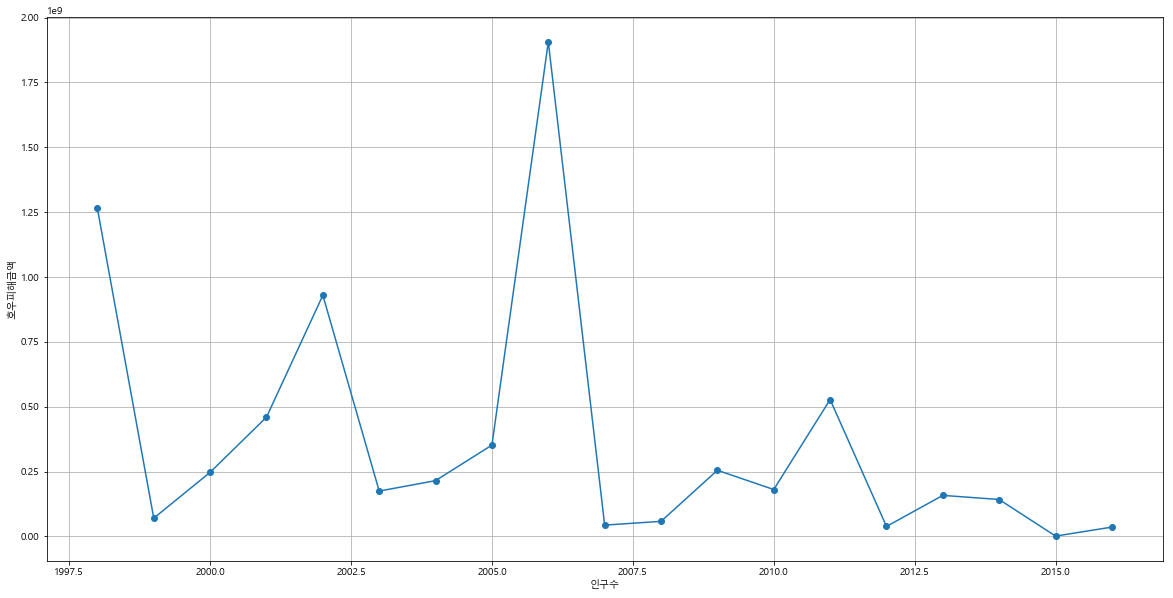

In [100]:
# 빈도수가 가장 높은 최대피해금액의 자연재해 종류를 알았으니 해당 재해의 연도별 피해금액 현황을 그래프로 나타내는 과정이다.

Rain_DMG = {} 

year = 1998
year_list = []
Rain_totdmgamt_list = [] # 연도별 호우의 피해금액을 저장하기 위한 리스트 변

while year < 2017:
    service = "getCauseDisaster"
    url = "http://apis.data.go.kr/1750000/disasterInfoService/" + service
    parameters = "?year="+str(year)
    parameters += "&ServiceKey=eclqdN%2B1IT%2FJH2vZKvDWG8AyUYbqn9sCpvJqCA%2F6%2B0UmPThIGP5AmuTGPbgAa2KwIq4%2FK0TA%2BEyudjWxrJo%2FqQ%3D%3D"

    url += parameters

    title_list = []
    totdmgamt_list = []
    
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')

    title = soup.find_all('title')
    totdmgamt = soup.find_all('totdmgamt')
    year_list.append(float(year))

    for i in title:
        title_list.append(i.text)
    
    for i in totdmgamt:
        totdmgamt_list.append(float(i.text))
    
    k = 0
    for i in title_list: #재해를 입력하면 금액이 나옴
        if i == "호우":
            Rain_totdmgamt_list.append(totdmgamt_list[k])
            
    year += 1

Rain_DMG['년도'] = year_list
Rain_DMG['호우피해금액'] = Rain_totdmgamt_list

df = pd.DataFrame(Rain_DMG)

df = df[['년도', '호우피해금액']]

plt.figure(figsize=(20, 10))
plt.plot(df['년도'], df['호우피해금액'], marker='o')
plt.grid()
plt.xlabel('인구수')
plt.ylabel('호우피해금액')
plt.show()


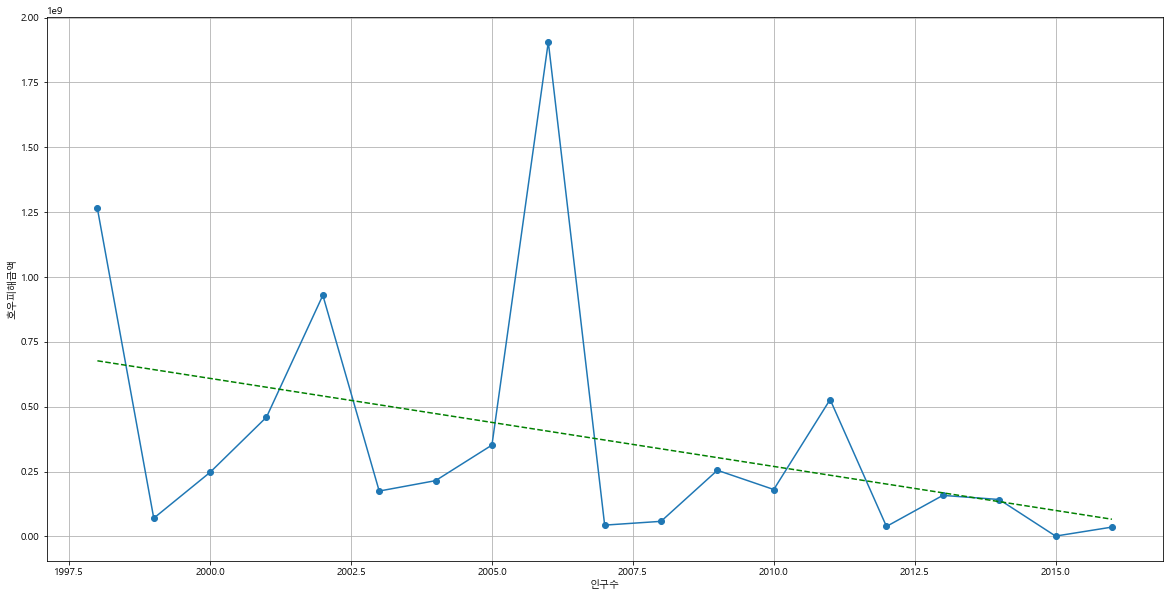

In [101]:
#Scatter 그래프를 이용하여 그래프의 추세를 확인한다.

fp1 = np.polyfit(df['년도'], df['호우피해금액'], 1)
f1 = np.poly1d(fp1)
plt.figure(figsize=(20, 10))
plt.plot(df['년도'], df['호우피해금액'], marker='o')
plt.plot(df['년도'], f1(df['년도']), ls='dashed', color='g')
plt.xlabel('인구수')
plt.ylabel('호우피해금액')
plt.grid()
plt.show()